In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

import seaborn as sns

import bokeh
from bokeh.charts import Line
from bokeh.plotting import show, output_file
from bokeh.charts import Chart, Line, TimeSeries
from bokeh.models import HoverTool

output_file("bokeh.html")

#from IPython.core.display import HTML
#css = open('style-table.css').read() + open('style-notebook.css').read()
#HTML('<style>{}</style>'.format(css))

/usr/lib/python3/dist-packages/matplotlib/__init__.py:880: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [36]:
#mean_rents = pd.read_csv("/home/jan/src/govhack/Mean Rents by TA.csv").set_index(["Month"])
#mean_rents.index = mean_rents.index.map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date())
#mean_rents.index_name = "Date"
mean_rents = pd.DataFrame.from_csv("Mean Rents by TA.csv", index_col=None, parse_dates=["Month"])
selected = mean_rents[["Month", "Wellington", "Christchurch", "National Total"]].set_index(["Month"])

#plot = selected.plot()

#for column in selected.columns:
#    last = selected[column].values[-1]
#    plot.annotate("$%s" % last, xy=(1, last), xytext=(8, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')

chart = Line(selected, xlabel="Date", ylabel="Rent", tools='box_zoom,pan,save,hover,resize,reset,wheel_zoom')
hover = chart.select(dict(type=HoverTool))
hover.tooltips = [
    ("Rent", "$y")
]
output_file("wlg-chch.html")
bokeh.io.show(chart)

In [108]:
mean_rents[mean_rents.Month.dt.year == 2010]
mean_rents.set_index(["Month"])

,Ashburton District,Auckland,Buller District,Carterton District,Central Hawkes Bay District,Central Otago District,Christchurch,Clutha District,Dunedin,Far North District,...,Wairoa District,Waitakere,Waitaki District,Waitomo District,Wanganui District,Wellington,Western Bay Of Plenty District,Westland District,Whakatane District,Whangarei District
Month,,,,,,,,,,,,,,,,,,,,,
1993-01-01,112,200,92.0,92.0,NaN,98,153,80,145,134,...,90.0,177,96,90.0,126,197,126,NaN,126,123
1993-02-01,98,205,83.0,93.0,100.0,103,158,76,167,124,...,105.0,184,85,91.0,117,196,136,NaN,129,125
1993-03-01,106,199,89.0,98.0,117.0,103,159,83,180,111,...,80.0,184,79,79.0,119,200,127,114.0,119,124
1993-04-01,117,201,89.0,98.0,104.0,113,153,85,161,120,...,90.0,182,80,91.0,118,192,137,116.0,140,123
1993-05-01,125,210,78.0,95.0,107.0,111,155,81,146,121,...,95.0,186,82,83.0,118,209,128,NaN,128,123
1993-06-01,97,202,98.0,115.0,118.0,110,155,81,135,119,...,80.0,185,96,86.0,124,203,126,NaN,131,124
1993-07-01,127,213,93.0,99.0,113.0,103,156,81,143,117,...,95.0,183,88,85.0,120,199,132,100.0,130,118
1993-08-01,118,208,94.0,110.0,126.0,110,151,78,138,116,...,100.0,187,92,76.0,118,200,129,127.0,133,128
1993-09-01,115,212,66.0,101.0,122.0,109,154,88,143,118,...,94.0,183,98,99.0,115,202,134,112.0,139,123


/home/jan/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<IPython.core.display.Javascript object>


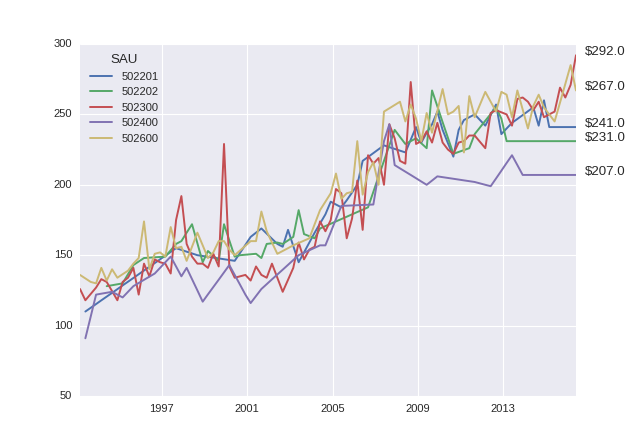

In [4]:
detailed = pd.read_csv("detailed.csv", index_col="SAU")
#detailed[detailed.Bedrooms == "2"].loc["500301"][3:]
#row = detailed[detailed.Bedrooms == "2"][detailed.SAU == 500301][detailed.Property_Type == "Property Type Total"].loc[:,"1993-03-01":]
#row = detailed[detailed.SAU == 500301][detailed.Property_Type == "Property Type Total"].loc[:,"1993-03-01":]
#row = detailed[detailed.Property_Type == "Property Type Total"][detailed.Bedrooms == "2"].loc[500301, "Bedrooms":]
row = detailed[detailed.Property_Type == "Property Type Total"].loc[:, "Bedrooms":]
row = row[row.Bedrooms == "2"].loc[:, "1993-03-01":]
row_t = row.T
row_t.index = row_t.index.map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date())
#row_t
#row_t.index.names = ["Rent"]
#row_t.columns = ["Rent"]
selection = row_t.iloc[:, 46:51].interpolate()
#selection.columns = ["A", "B", "C", "D", "E"]
#selection
plot = selection.plot()
for column in selection.columns:
    last = selection[column].values[-1]
    plot.annotate("$%s" % last, xy=(1, last), xytext=(8, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')

#chart = Line(selection, xlabel="Date", ylabel="Rent", tools='box_zoom,pan,save,hover,resize,reset,wheel_zoom')
#hover = chart.select(dict(type=HoverTool))
#hover.tooltips = [
#    ("Rent", "$y")
#]
#output_file("by-sau.html")
#bokeh.io.show(chart)

In [5]:
all_crimes = pd.read_csv("crimestats.csv",parse_dates = ['Year or Month'],usecols=['Location', 'Scene', 'Offence', 'Year or Month',
'Measure', 'Value'])
all_crimes.columns
# Get All Offences based on year
#all_crimes.groupby(['Offence','Year or Month']).mean()
#all_crimes.groupby(['Offence','Location']).size()
#all_crimes.Location.groupby(['Offence']).describe
all_crimes['Location'].groupby(all_crimes['Offence']).describe()
#list(by_group)
#all_crimes.head
# Get Homicide across NZ
#all_crimes[(all_crimes['Offence'] == 'Homicide and related offences') & (all_crimes['Location'] == 'Total New Zealand')]

Offence                                                                                   
Abduction, harassment and other related offences against a person                   count                  52
                                                                                    unique                 13
                                                                                    top       Tasman District
                                                                                    freq                    4
Acts intended to cause injury                                                       count                  52
                                                                                    unique                 13
                                                                                    top       Tasman District
                                                                                    freq                    4
Dangerous or negligent acts e

In [38]:
data_210 = mean_rents[['Month','Wellington','Marlborough District','Upper Hutt','Porirua','Kapiti Coast District','South Wairarapa District','Lower Hutt']]
data_210
data_2010 = data_210[(mean_rents.Month.dt.year > 2000) & (mean_rents.Month.dt.year < 2010)]
welly = data_2010.set_index('Month')
#welly.plot()
chart = Line(welly, xlabel='Year', ylabel='Rent')
#bokeh.io.show(chart)
current_year = data_210[(data_210.Month.dt.year >= 2015) & (data_210.Month.dt.year <= 2016)]
#current_year.set_index('Month').plot()
chart = Line(current_year.set_index('Month'), xlabel='Year', ylabel='Rent', tools='box_zoom,pan,save,hover,resize,reset,wheel_zoom')

hover = chart.select(dict(type=HoverTool))
hover.tooltips = [
#    ("Date", "$x"),
    ("Rent", "$y")
]

#for column in current_year.columns:
#    last = current_year[column].values[-1]
#    chart.add_layout(Label(x=last, y=1, text=last))
#test = Label(x=, y=, text=)
output_file("bokeh-test.html")
bokeh.io.show(chart)